<a href="https://colab.research.google.com/github/aryanxp/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 5.1 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=edadf566a1d12e5c4cf6f976442e978df2a801f4149e11d612c2d69eb72bad32
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
!git clone https://github.com/aryanxp/Face-Recognition.git

Cloning into 'Face-Recognition'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [8]:
%cd Face-Recognition/images

/content/Face-Recognition/images


In [9]:
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [10]:
face1 = face_recognition.load_image_file("elon.jpg")
face1_encoding = face_recognition.face_encodings(face1)[0]

face2 = face_recognition.load_image_file("Donald Trump.jpg")
face2_encoding = face_recognition.face_encodings(face2)[0]

face3 = face_recognition.load_image_file("jeffbezos.jpg")
face3_encoding = face_recognition.face_encodings(face3)[0]

known_face_encodings = [
                        face1_encoding,face2_encoding,face3_encoding
]

known_face_names = [
                    "Elon Musk","Donald Trump","Jeff Bezos"
]

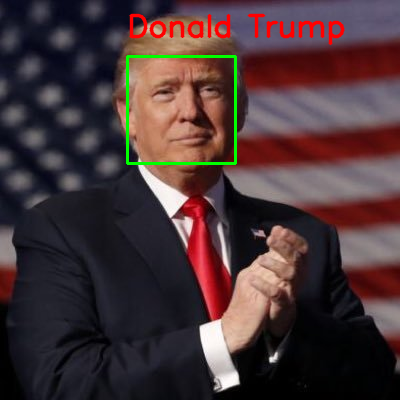

In [14]:
file_name = "unknown_do.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image,face_locations)

for (top,right,bottom,left),face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unkown"
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left,top),(right,bottom),(0,255,0),2)
  cv2.putText(unknown_image_to_draw,name,(left,top-20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)